In [83]:
from run_single_stock import prepare_stock_data, load_config
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np



In [84]:
stock = 'CSCO'

config = load_config()

data = prepare_stock_data([stock], config["start_date"], config["end_val_date"])

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

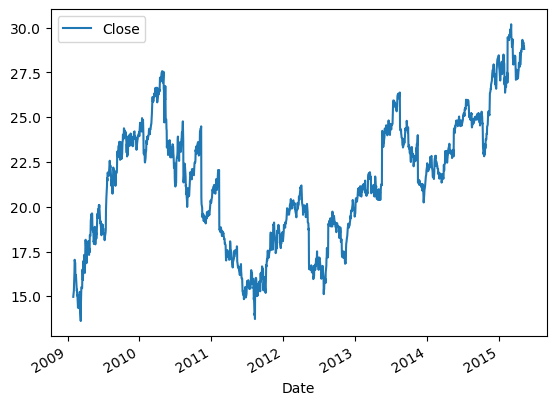

In [85]:
data[stock].plot(y='Close')

Load binance data

In [86]:
# stock = 'SOLUSDT'

# config = load_config()
# data = prepare_stock_data([stock], '2020-08-12 00:00:00', '2020-08-17 23:59:00')

# data_train = {}
# data_train[stock] = data[stock][:60*24*1]
# data_test = {}
# data_test[stock] = data[stock][60*24*1 : 60*24*1 + 60*24//4] 

Load binance data (ramasite din parserul de date binance)

In [87]:
# from dqn.data_processing import load_data

# bucket_nums = 1
# data = None
# for bucket in range(0, bucket_nums):
#     print(f"Loading bucket {bucket}")
#     bucket_data = load_data(f"data_binance/SOLUSDT_buckets/SOLUSDT-1m-{bucket}.csv")
#     # print(bucket_data.head())
#     data = pd.concat([data, bucket_data], axis=0)
#     # print('concated\n', data.head())
    
# from stock_data_pipeline import StockDataPipeline

# from dqn.data_processing import load_data

# bucket_nums = 1
# data = None
# for bucket in range(0, bucket_nums):
#     print(f"Loading bucket {bucket}")
#     bucket_data = load_data(f"data_binance/SOLUSDT_buckets/SOLUSDT-1m-{bucket}.csv")
#     # print(bucket_data.head())
#     data = pd.concat([data, bucket_data], axis=0)
#     # print('concated\n', data.head())

# # data.rename(columns={
# #     'date': 'Date',
# #     'open': 'Open',
# #     'high': 'High',
# #     'low': 'Low',
# #     'close': 'Close',
# #     'volume': 'Volume'
# # }, inplace=True)
# # data.drop(columns=['nrOfTrades'], inplace=True)
# # data['Adj Close'] = data['Close']
# # data.to_csv('data/SOLUSDT.csv')

# data_pipeline = StockDataPipeline(['SOLUSDT'], config["start_date"], config["end_date"])
# data = data_pipeline.run()
# data

In [88]:
# save prices for later
prices = data[stock]['Close'].values

Normalize data

In [89]:
scaler = MinMaxScaler()
data[stock] = pd.DataFrame(scaler.fit_transform(data[stock]), columns=['Open','High','Low','Close','Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX'], index=data[stock].index)


data_train = {}
data_train[stock] = data[stock][:int(len(data[stock])*0.7)]
prices_train = prices[:int(len(data[stock])*0.7)]

data_test = {}
data_test[stock] = data[stock][int(len(data[stock])*0.7):]
prices_test = prices[int(len(data[stock])*0.7):] 

In [90]:
data_train[stock].describe()

,Open,High,Low,Close,Volume,MACD,Signal,RSI,CCI,ADX
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,0.377706,0.378938,0.402292,0.387589,0.079306,0.549583,0.547466,0.521674,0.455478,0.308350
std,0.186801,0.187420,0.185454,0.182721,0.061458,0.207787,0.215997,0.184327,0.128966,0.184617
min,0.000000,0.000000,0.000000,0.000000,0.000293,0.000000,0.000000,0.011205,0.000000,0.020748
25%,0.225417,0.224521,0.249692,0.237025,0.049092,0.428733,0.415882,0.392386,0.357126,0.175791
50%,0.365492,0.362261,0.390875,0.374774,0.067091,0.568928,0.571810,0.524459,0.475066,0.250554
75%,0.520563,0.522545,0.542232,0.530628,0.091839,0.700976,0.716465,0.654640,0.555077,0.405831
max,0.850340,0.841260,0.874229,0.841883,1.000000,1.000000,1.000000,0.971087,1.000000,1.000000


In [91]:
data_test[stock].describe()

,Open,High,Low,Close,Volume,MACD,Signal,RSI,CCI,ADX
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.668981,0.669282,0.694534,0.672940,0.044186,0.567020,0.571034,0.524410,0.450953,0.316370
std,0.141354,0.142706,0.140141,0.138524,0.033413,0.168158,0.175417,0.189600,0.128942,0.164724
min,0.397032,0.399012,0.426634,0.399517,0.000000,0.224576,0.247836,0.000000,0.051525,0.000000
25%,0.554886,0.553582,0.576141,0.561859,0.025088,0.449547,0.443384,0.376163,0.355717,0.197518
50%,0.661719,0.659049,0.688039,0.665661,0.036461,0.577320,0.576760,0.526807,0.465291,0.281034
75%,0.771490,0.763897,0.789149,0.769010,0.053012,0.688639,0.703862,0.663983,0.557443,0.427195
max,1.000000,1.000000,1.000000,1.000000,0.424342,0.983460,0.985421,1.000000,0.815559,0.747785


<Axes: xlabel='Date'>

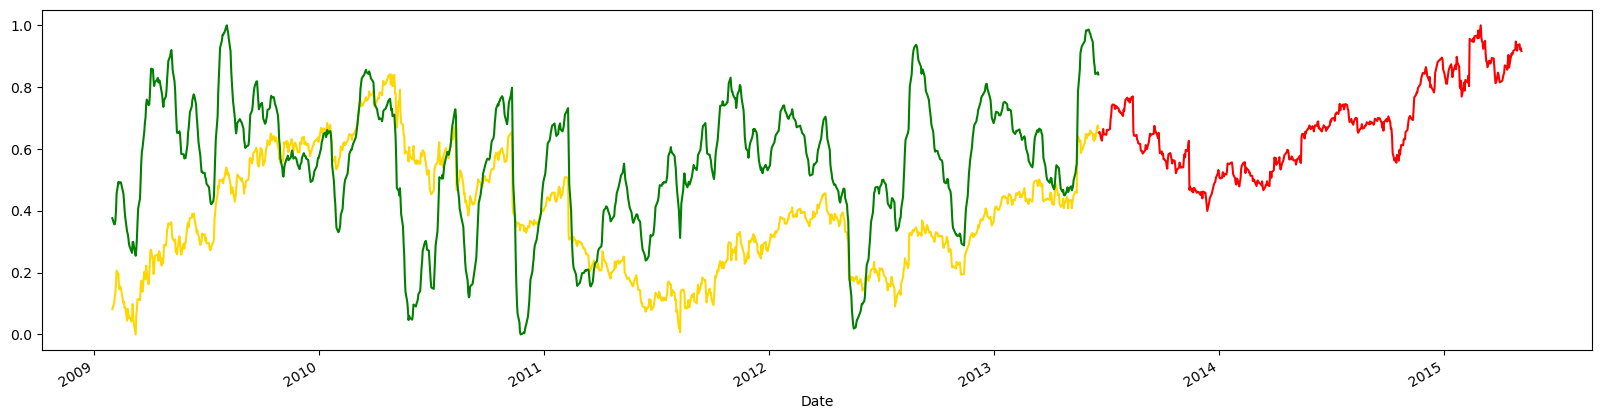

In [92]:
data_train[stock]['Close'].plot(figsize=(20, 5), color='gold')
data_train[stock]['MACD'].plot(figsize=(20, 5), color='g')
# data_train[stock]['RSI'].plot(figsize=(20, 5), color='hotpink')

data_test[stock]['Close'].plot(figsize=(20, 5), color='r')

<Axes: xlabel='Date'>

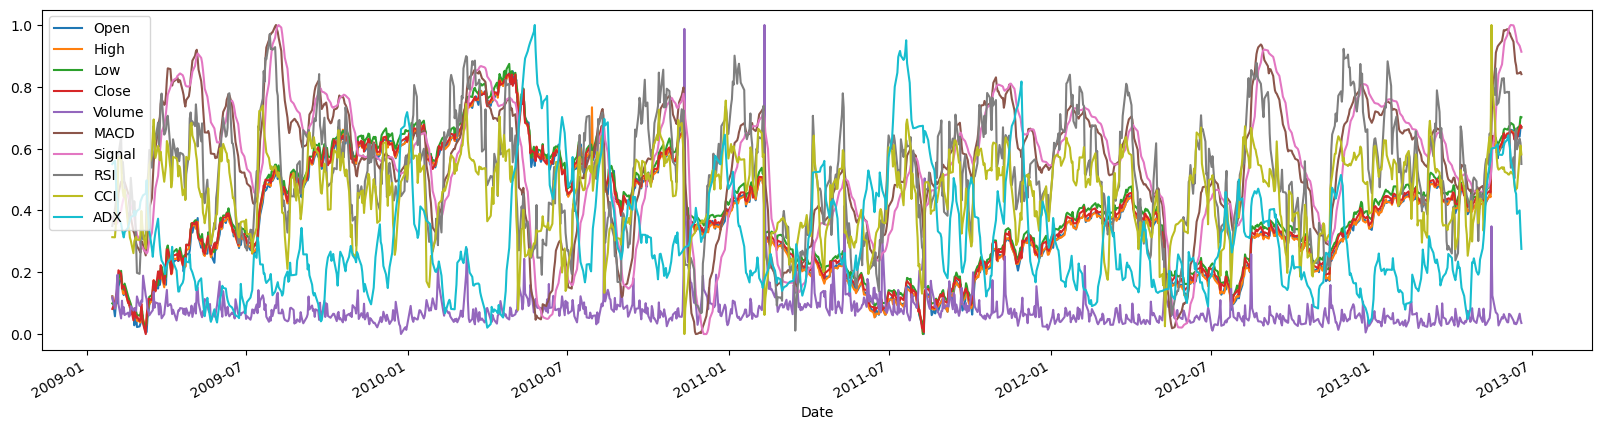

In [93]:
data_train[stock].plot(figsize=(20, 5))

In [94]:
print('Null Values =',data_train[stock].isnull().values.any())
print('Null Values =',data_test[stock].isnull().values.any())

Null Values = False
Null Values = False


In [95]:
import gym
import numpy as np
from enum import Enum

class Actions(Enum):
    Sell = 0
    Buy = 1

class StockTradingEnv(gym.Env):
    def __init__(self, df, window_size, initial_balance=10000, prices=None):
        super(StockTradingEnv, self).__init__()
        
        self.df = df
        self.window_size = window_size
        
        if prices is None:
            self.prices = df['close'].values if 'close' in df.columns else df['Close'].values
        else:
            self.prices = prices
        
        self.prices_norm = df['close'].values if 'close' in df.columns else df['Close'].values
        
        self.shape_features = (window_size, self.df.shape[1])
        self.initial_balance = initial_balance
        self.balance = self.initial_balance
        
        # Spaces
        self.action_space = gym.spaces.Discrete(len(Actions))
        
        # Observations
        INF = 1e10
        self.observation_space = gym.spaces.Box(
            low=-INF, high=INF, shape=self.shape_features, dtype=np.float32,
        )
        
        # Variables
        self._current_tick = window_size
        self._end_tick = len(self.prices) - 1
        self._total_reward = 0
        self._position_size = 0
        
    
    def step(self, action):
        self._current_tick += 1
        
        done = False
        if self._current_tick + 1 >= self._end_tick:
            done = True
        
        step_reward = self._calculate_reward(action)
        self._total_reward += step_reward
        
        self._take_action(action)
        
            
        observation = self._get_observation()
        
        return observation, step_reward, done, self._get_info()
        
    # def _calculate_reward(self, action):
    #     if action == Actions.Buy.value and self.balance > 0:
    #         return 0
    #     reward = 0
        
    #     current_price = self.prices[self._current_tick]
    #     last_trade_price = self.prices[self._last_buy_tick]
    #     reward += current_price - last_trade_price
            
    #     return reward
    def _calculate_reward(self, action):
        current_price_norm = self.prices_norm[self._current_tick]
        last_trade_price_norm = self.prices_norm[self._last_buy_tick]
        
        if action == Actions.Buy.value:
            if  self.balance > 0:
                return 0.01
            else:
                return 0
            
        if action == Actions.Sell.value:
            if self._position_size > 0:
                return current_price_norm - last_trade_price_norm
            else:
                return 0
        
        return 0 # uncreachable
        

    def _get_observation(self):
        return self.df.iloc[self._current_tick - self.window_size:self._current_tick].values
    
    def _get_info(self):
        return {
            'total_reward': self._total_reward,
            'balance': self.balance,
            'position': self._position_size * self.prices[self._current_tick],
        }
    
    def _take_action(self, action):
        current_price = self.prices[self._current_tick]
        
        if action == Actions.Buy.value and self.balance > 0:
            self._last_buy_tick = self._current_tick
            self._position_size = self.balance / current_price
            self.balance = 0.0
        
        if action == Actions.Sell.value and self._position_size > 0:
            self.balance = self._position_size * current_price
            self._position_size = 0
    
    def render(self):
        print(f'Balance: {self.balance}, Total Reward: {self._total_reward}, Position: {self._position_size * self.prices[self._current_tick]}')
    
    def reset(self):
        super().reset()
        self.balance = self.initial_balance
        self._position_size = 0
        self._current_tick = self.window_size
        self._last_buy_tick = self._current_tick
        return self._get_observation()
        

In [96]:
df_train = data_train[stock]

In [97]:
WINDOW_SIZE = 14

In [98]:
from stable_baselines3.dqn.policies import MlpPolicy
from stable_baselines3 import DQN

env = StockTradingEnv(df_train, WINDOW_SIZE, prices=prices_train)
model = DQN("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/ionut/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [99]:
EPOCHS = 15
TIMESTAMPS = df_train.shape[0]
model.learn(total_timesteps=TIMESTAMPS * EPOCHS, log_interval=4, progress_bar=True)

Output()

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.09e+03 |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 641      |
|    time_elapsed     | 6        |
|    total_timesteps  | 4352     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000243 |
|    n_updates        | 1062     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.09e+03 |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 767      |
|    time_elapsed     | 11       |
|    total_timesteps  | 8704     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.32e-05 |
|    n_updates        | 2150     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.09e+03 |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 697      |
|    time_elapsed     | 18       |
|    total_timesteps  | 13056    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00014  |
|    n_updates        | 3238     |
----------------------------------


In [100]:
df_test = data_test[stock]

In [101]:
def plot_actions_over_price_action(actions,  toPlot:{}):
    """
    Plot the actions taken by the agent over the price action.

    Parameters:
    - actions: List of actions taken by the agent.
    - prices: List of prices of the stock.
    """
    plt.figure(figsize=(20, 5))
    for key in toPlot:
        plt.plot(toPlot[key], label=key)
    
    plt.title('Actions taken by the agent over the price action')
    plt.xlabel('Time')

    old_action = Actions.Sell.value
    for i in range(len(actions)):
        if actions[i] != old_action:
            if actions[i] == 1:
                plt.axvline(x=i, color='g', linestyle='--', alpha=0.5)
            elif actions[i] == 0:
                plt.axvline(x=i, color='r', linestyle='--', alpha=0.5)
            old_action = actions[i]
    

    plt.legend()
    plt.show()

Balance: 0.0, Total Reward: 0.43631248919058885, Position: 11703.770165213164
Episode 1: 0.43631248919058885, Final Balance: 11703.770165213164


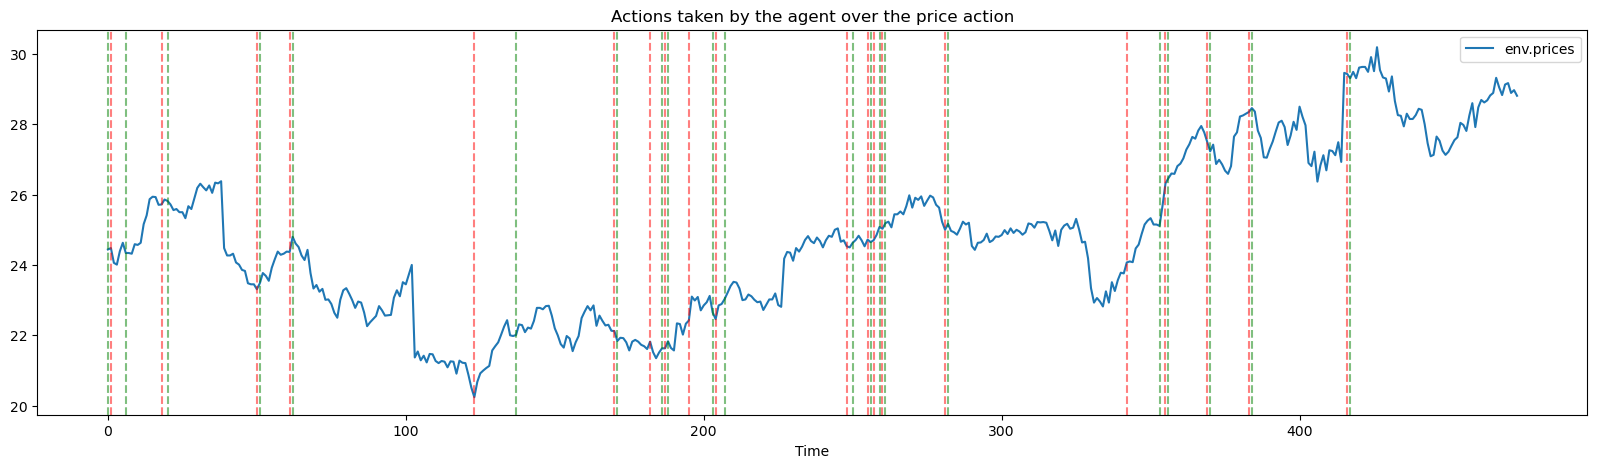

Average Reward over 1 episodes: 0.43631248919058885
Average Balance over 1 episodes: 11703.770165213164
Min Balance: 11703.770165213164
Max Balance: 11703.770165213164


In [105]:
def validate_model(model, env, num_episodes=10):
    """
    Validate the RL model on the given environment.

    Parameters:
    - model: The trained RL model.
    - env: The environment to validate the model on.
    - num_episodes: Number of episodes to run for validation.

    Returns:
    - average_reward: The average reward obtained over the validation episodes.
    """
    total_rewards = []
    total_balances = []

    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        episode_reward = 0
        episode_balance = 0
        actions = []

        step = 0
        while not done:
            action, _states = model.predict(obs)
            obs, reward, done, info = env.step(action)
            episode_reward += reward
            
            # if step % 500 == 0:
            # env.render()
                
            if done:
                env.render()
                episode_balance = info['balance'] + info['position'] # one of two will be zero
                
            step += 1
            actions.append(action)
            
        print(f'Episode {episode + 1}: {episode_reward}, Final Balance: {episode_balance}')
        total_rewards.append(episode_reward)
        total_balances.append(episode_balance)
        
        if num_episodes == 1:
            plot_actions_over_price_action(actions, {'env.prices':env.prices})

    average_reward = np.mean(total_rewards)
    print(f'Average Reward over {num_episodes} episodes: {average_reward}')
    average_balance = np.mean(total_balances)
    print(f'Average Balance over {num_episodes} episodes: {average_balance}')
    print(f'Min Balance: {min(total_balances)}')
    print(f'Max Balance: {max(total_balances)}')
    return average_reward

test_env = StockTradingEnv(df_test, WINDOW_SIZE, prices=prices_test)
average_reward = validate_model(model, test_env, num_episodes=1)